**1. Import libraries**

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

**2. Dataset**

In [2]:
#Read dataset

df = pd.read_csv('drive/MyDrive/Colab Notebooks/MACHINE LEARNING/Decission Tree/titanic.csv')

print(df.shape)
print(df.info())
print(df.columns)
print(df.head())

nans = df.isna().sum()
print(nans)

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1   

**3. Preprocessing**

In [3]:
#Obtain sublevels per column

for col in df.columns:
    print(f'Columna {col}: {df[col].nunique()} sublevels')


Columna PassengerId: 891 sublevels
Columna Survived: 2 sublevels
Columna Pclass: 3 sublevels
Columna Name: 891 sublevels
Columna Sex: 2 sublevels
Columna Age: 88 sublevels
Columna SibSp: 7 sublevels
Columna Parch: 7 sublevels
Columna Ticket: 681 sublevels
Columna Fare: 248 sublevels
Columna Cabin: 147 sublevels
Columna Embarked: 3 sublevels


In [4]:
#Statistical info for numeric columns

df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


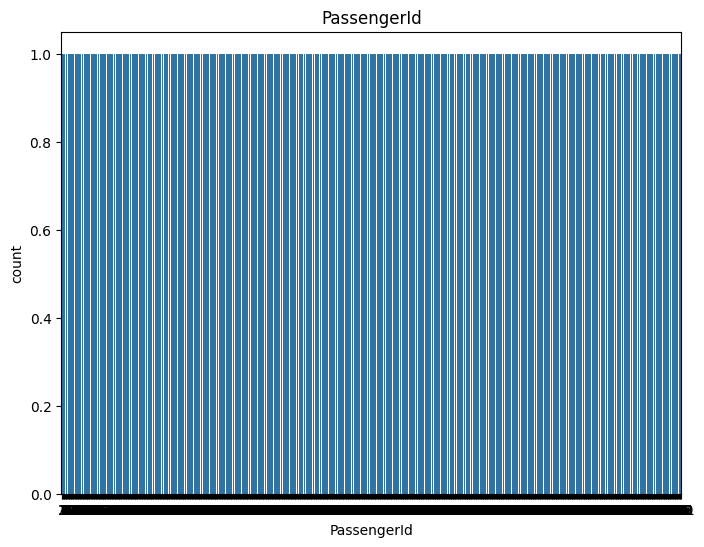

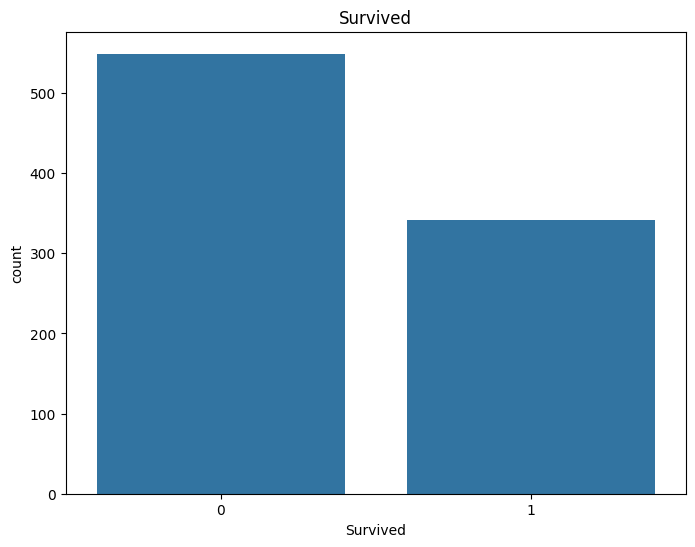

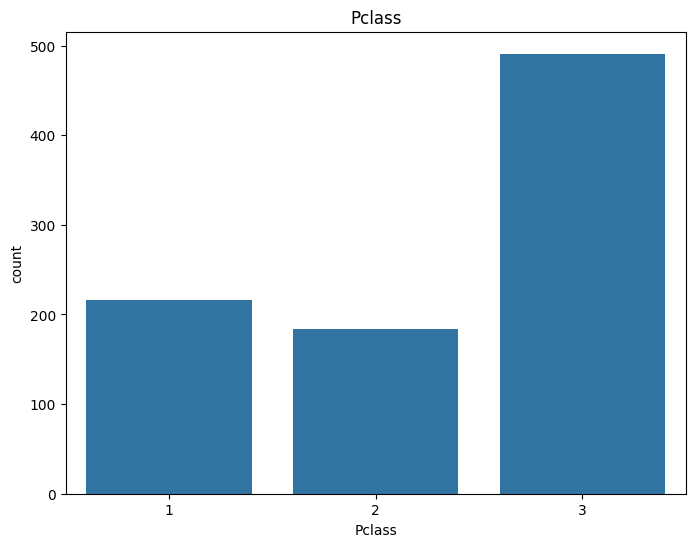

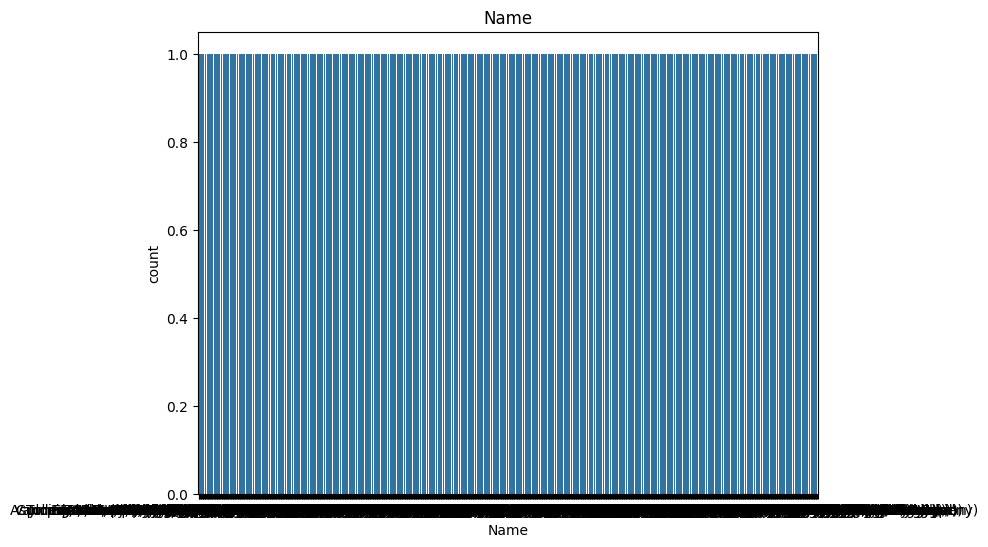

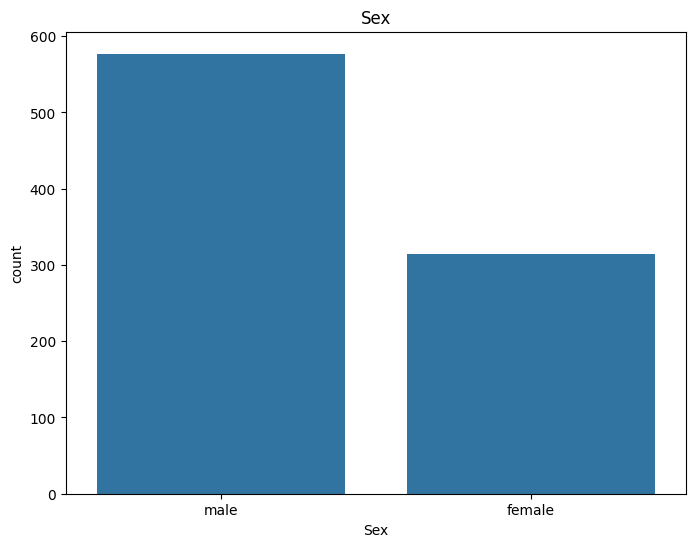

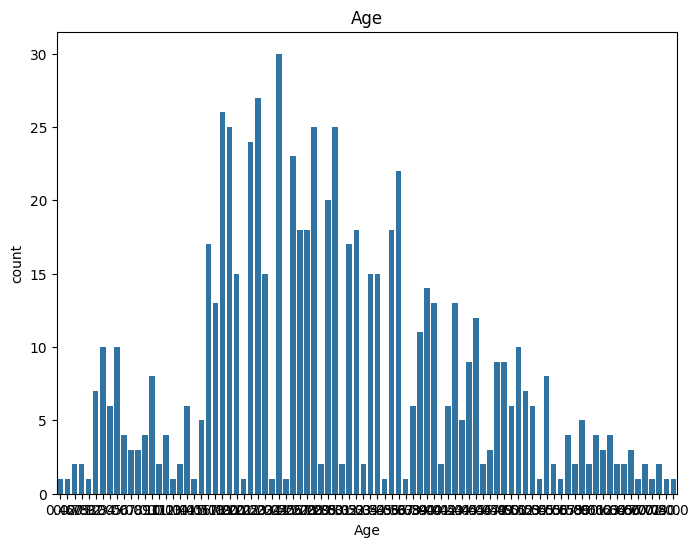

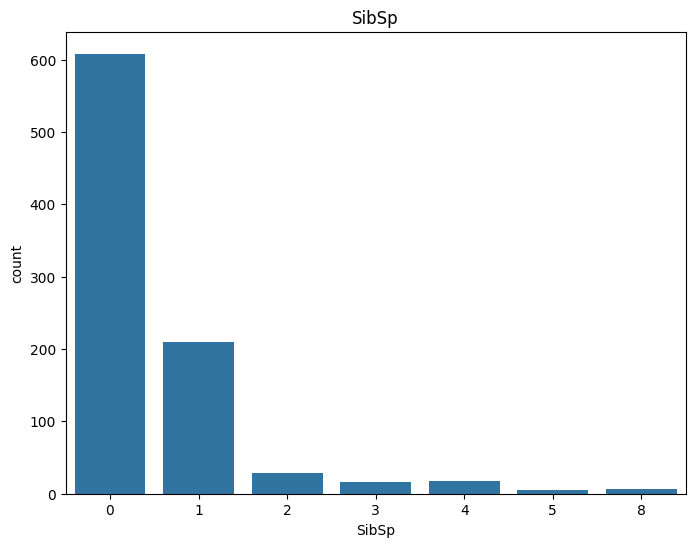

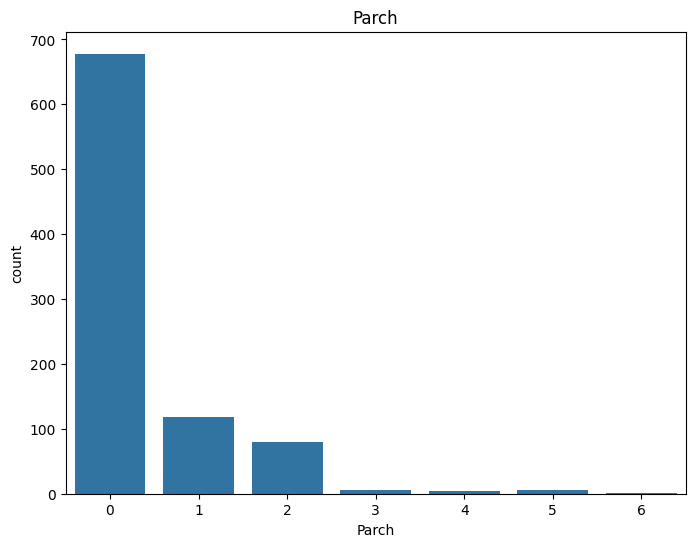

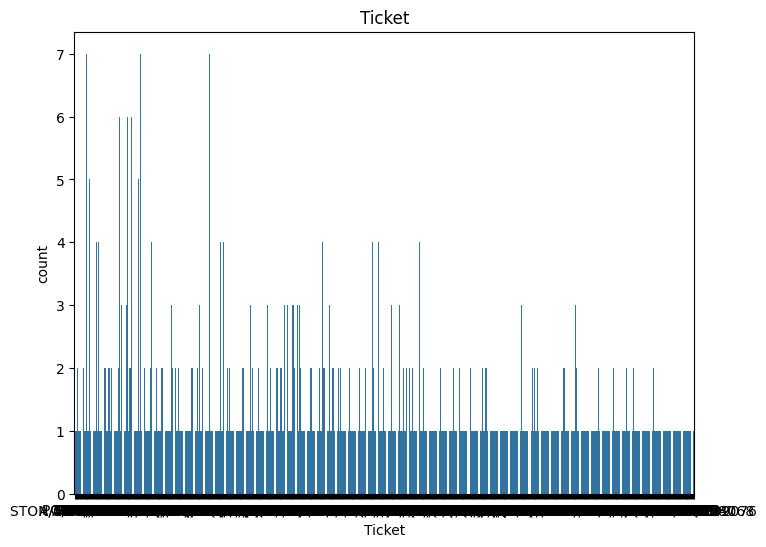

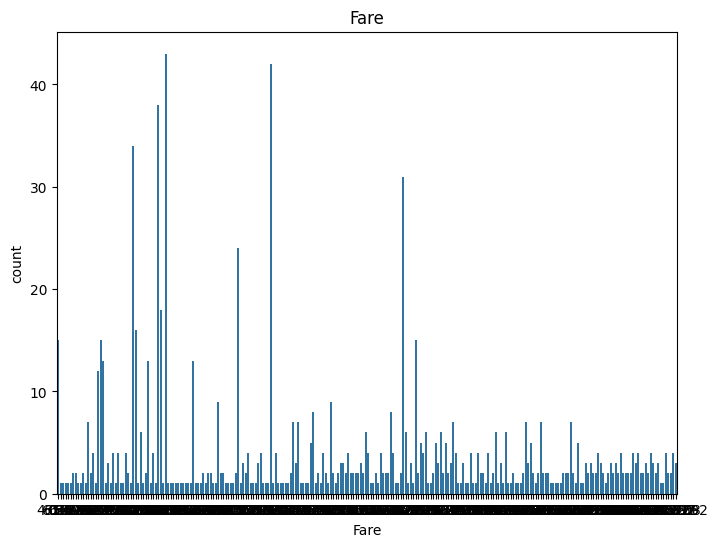

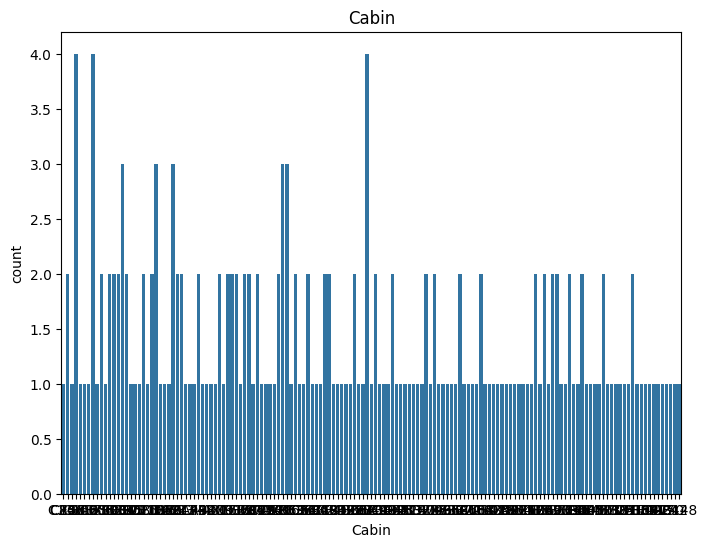

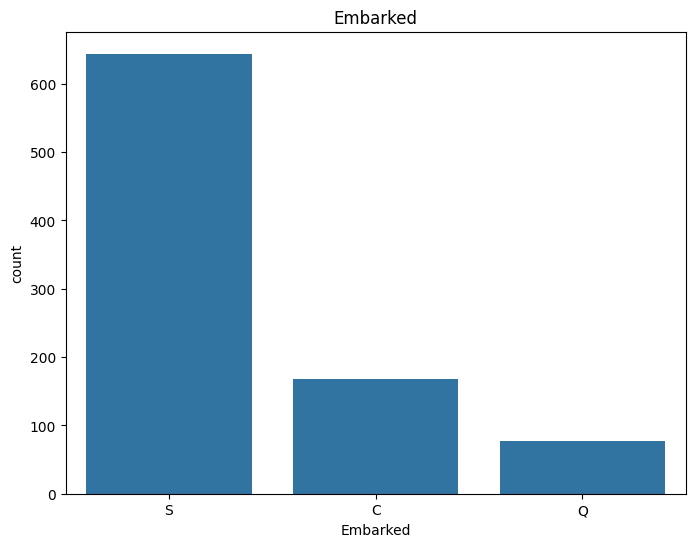

In [5]:
#Graph each column to analyse the data better

for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=column, data=df)
  plt.title(column)
  plt.show()

In [7]:
#We are going to delete some columns after this considerations:

#EmployeeCount - Only one category, doesnot add value
#PassengerId- Unique value per employee, doesnot add value
#Cabin - A lot of missing values, not a crucial variable to analize
#Ticket - This is an irrelevant column
#Fare - We could considet this as redundant column, since the Pclass gives info about the price of the ticket

df = df.drop(['PassengerId', 'Name','Cabin','Ticket','Fare'], axis=1)

KeyError: "['PassengerId', 'Name', 'Cabin', 'Ticket', 'Fare'] not found in axis"

In [8]:
#For the missing values in the Age column, we are going to input them using the mean and the std to keep the normal distribution of the data
mean_age = df['Age'].mean()
std_age = df['Age'].std()*0.4
new_values_age = np.random.normal(mean_age, std_age, size=df['Age'].isna().sum())

df.loc[df['Age'].isna(), 'Age'] = new_values_age

#Convert the datatype from float to int
df['Age'] = df['Age'].astype(int)


#For the missing values in the Embarked column, we are going to input them considering the most repeated value (S)
df['Embarked'].fillna('S', inplace=True)

nans = df.isna().sum()
print(nans)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64


<ipython-input-8-c34644939db2>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


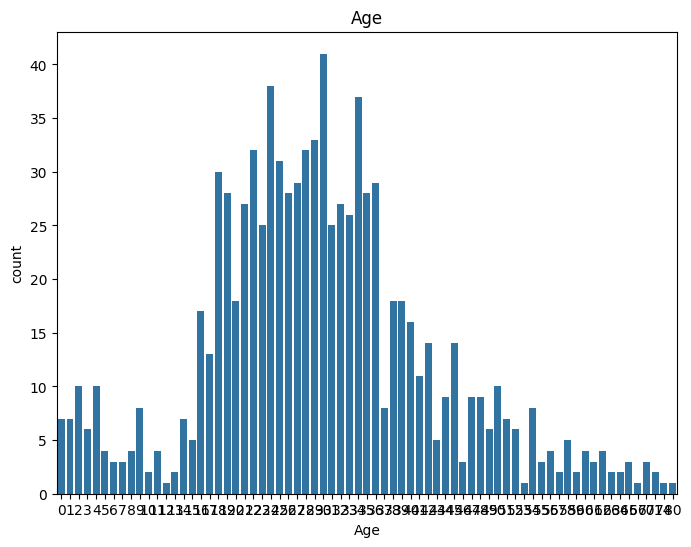

In [10]:
#Graphic of the Age to see if we kept the behaviour after the input of the data

plt.figure(figsize=(8, 6))
sns.countplot(x=df.Age, data=df)
plt.title('Age')
plt.show()

In [11]:
#Check new size of the dataframe

print(df.shape)

(891, 7)


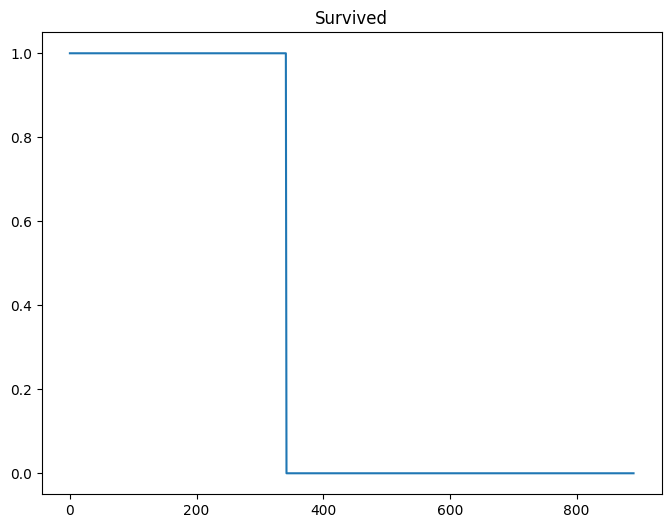

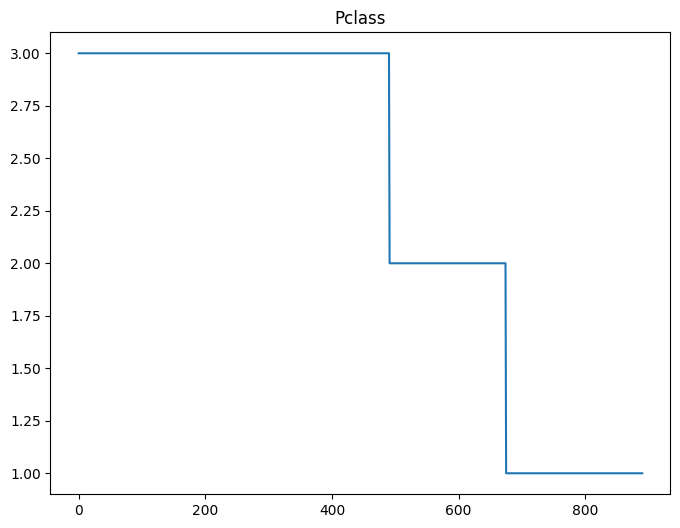

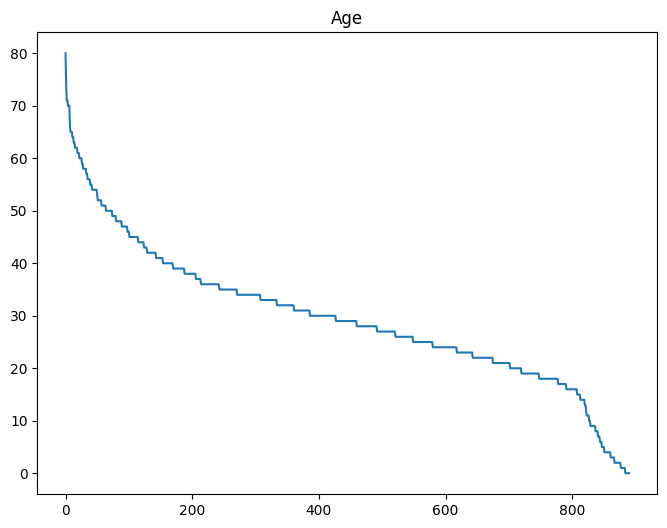

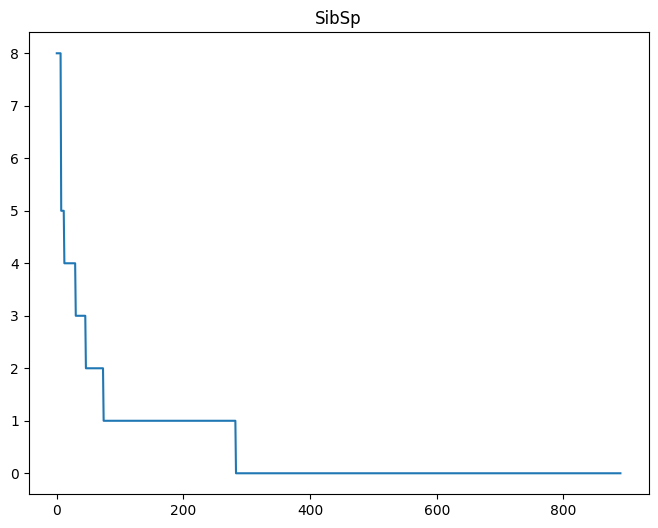

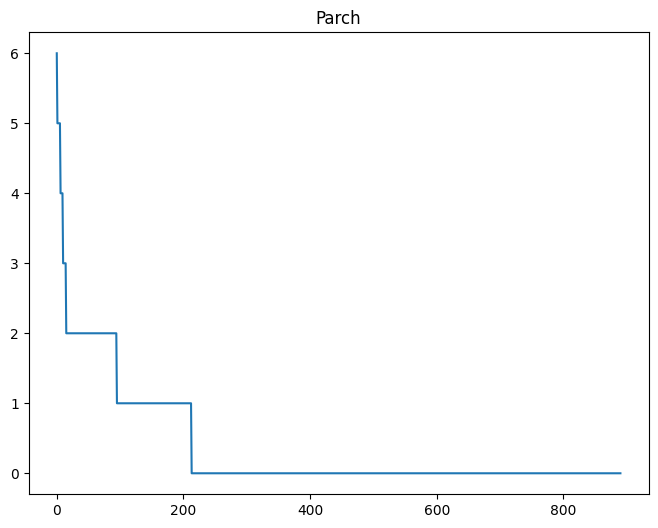

In [12]:
#Numerical columns

numeric_columns = df.select_dtypes(include=['number'])

for column in numeric_columns:
  plt.figure(figsize=(8, 6))
  df_ordered=df.sort_values(by=column,ascending=False)
  plt.plot(df_ordered[column].values)
  plt.title(column)
  plt.show()

**4. Business Analytics**

Survivor rate

In [13]:
df.Survived.value_counts(normalize = True) * 100

,proportion
Survived,
0,61.616162
1,38.383838


Relationship of Survived by Sex

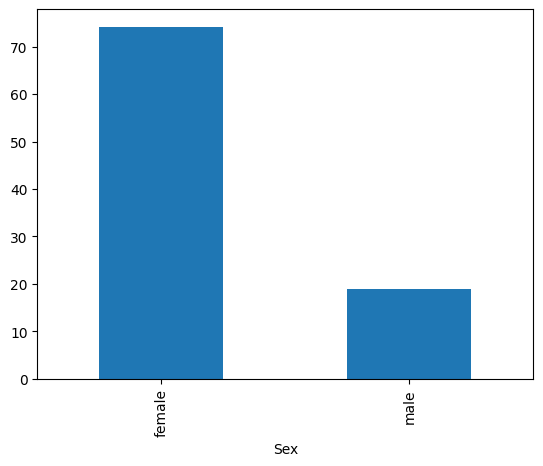

In [17]:
temp = df.groupby('Sex').Survived.mean().sort_values(ascending = False)*100
temp.plot.bar();

Relationship of Survived by Age

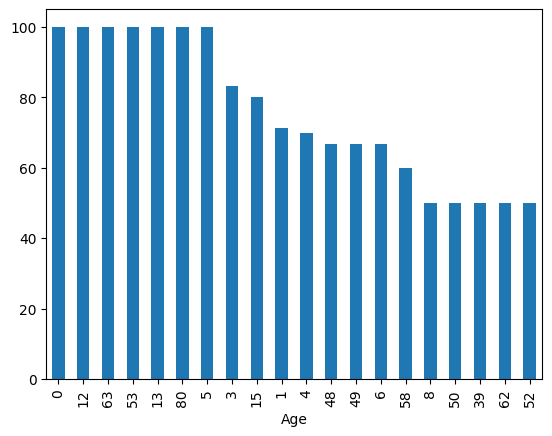

In [18]:
temp = df.groupby('Age').Survived.mean().sort_values(ascending = False)*100
temp.head(20).plot.bar();

Relationship of Survived by Embarked

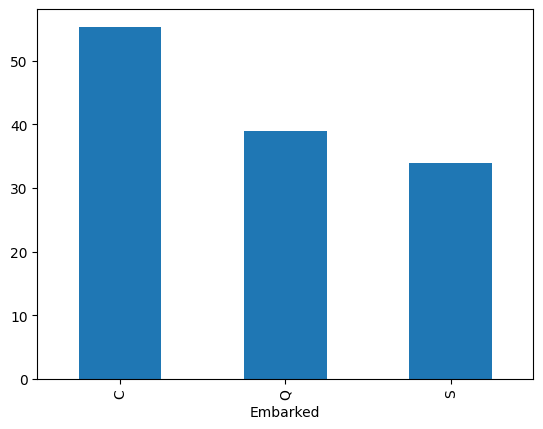

In [19]:
temp = df.groupby('Embarked').Survived.mean().sort_values(ascending = False)*100
temp.plot.bar();

Relationship of Survived by Pclass

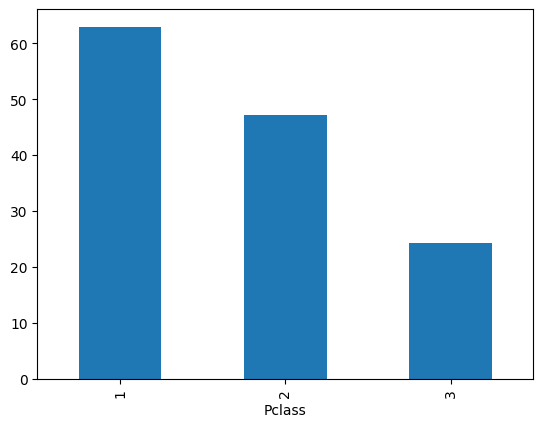

In [20]:
temp = df.groupby('Pclass').Survived.mean().sort_values(ascending = False)*100
temp.plot.bar();

Relationship of Survived by SibSp

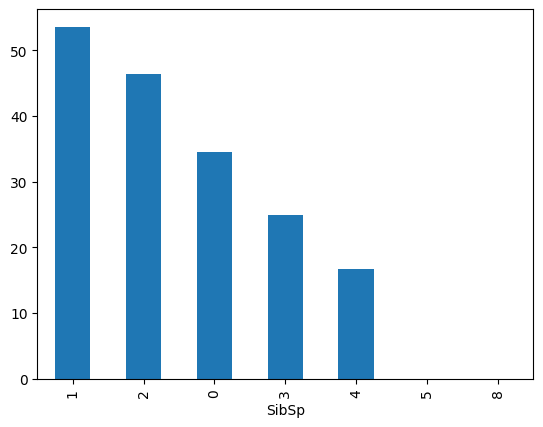

In [21]:
temp = df.groupby('SibSp').Survived.mean().sort_values(ascending = False)*100
temp.plot.bar();

Conclusion:

The average perfil of a person who survived is:


*   Female
*   Old people and children
*   Pclass high
*   With less than 2 relatives
















**4. ML Model - Decision Tree**

In [23]:
#Create a copy of the model to use it in ML
df_ml=df.copy()

In [24]:
#Transform all the categorical variables to numeric variables

cat = df_ml.select_dtypes('O')

ohe = OneHotEncoder(sparse_output=False)
ohe.fit(cat)
cat_ohe = ohe.transform(cat)
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

cat_ohe.head(20)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
5,0.0,1.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,1.0
9,1.0,0.0,1.0,0.0,0.0


In [25]:
#Select numerical columns
num = df.select_dtypes('number').reset_index(drop = True)


In [26]:
#Unify to create dataframe
df_ml = pd.concat([cat_ohe,num], axis = 1)
print(df_ml.head(3))

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Survived  Pclass  \
0         0.0       1.0         0.0         0.0         1.0         0       3   
1         1.0       0.0         1.0         0.0         0.0         1       1   
2         1.0       0.0         0.0         0.0         1.0         1       3   

   Age  SibSp  Parch  
0   22      1      0  
1   38      1      0  
2   26      0      0  


In [27]:
#Separate between predictors and target

X = df_ml.drop(columns='Survived')
Y = df_ml['Survived']

In [28]:
#Create sets for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
#Model
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='sqrt',random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       random_state=42)

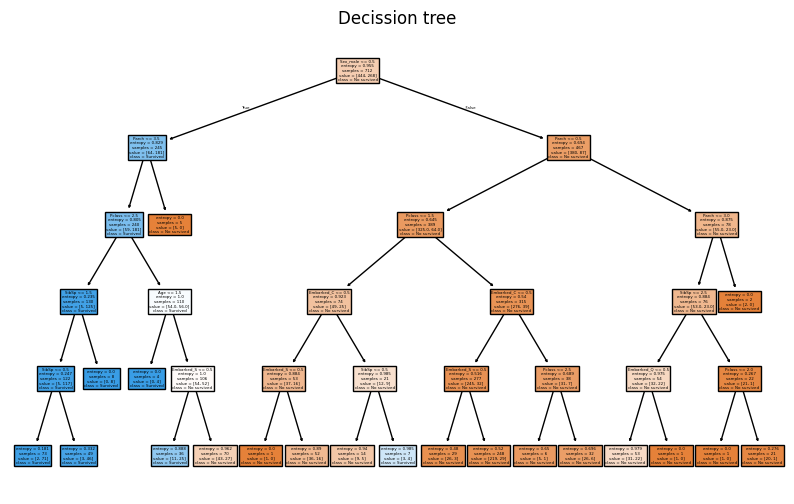

In [30]:
#Visualize model
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No survived', 'Survived'])
plt.title("Decission tree")
plt.show()

In [31]:
#Prediction
Y_pred = model.predict(X_test)

In [32]:
#Acccuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.8044692737430168


In [33]:
#Print classification report
print("\nClassification report:")
print(classification_report(Y_test, Y_pred))


Classification report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.84      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



Confusion matrix:
[[96  9]
 [26 48]]


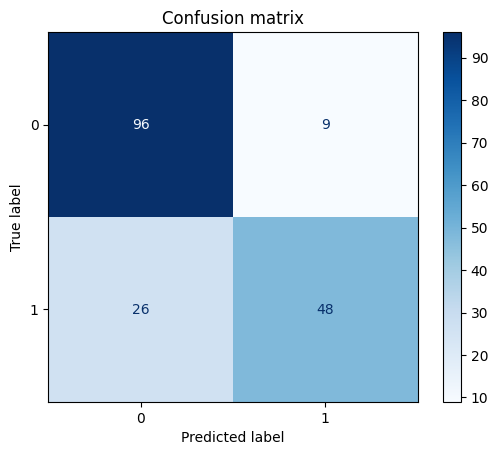

In [34]:
#Confusion matrix
print("Confusion matrix:")
print(confusion_matrix(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.show()

In [35]:
#Comparing real values with predictions
Y_pred = model.predict(X_test)
comparison = pd.DataFrame({'Real Values': Y_test, 'Predicted Values': Y_pred})
print(comparison.head(25))

     Real Values  Predicted Values
709            1                 0
439            0                 0
840            0                 0
720            1                 1
39             1                 1
290            1                 1
300            1                 1
333            0                 0
208            1                 1
136            1                 1
137            0                 0
696            0                 0
485            0                 0
244            0                 0
344            0                 0
853            1                 1
621            1                 0
653            1                 1
886            0                 0
110            0                 0
294            0                 0
447            1                 0
192            1                 0
682            0                 0
538            0                 0


**4. ML Model - Random Forest**

In [36]:
#We include a Random Forest to see the if the behaviour of the model is improved
model_rf = RandomForestClassifier(n_estimators=200,max_depth=5,max_features='sqrt',random_state=42)
model_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [37]:
#Make predictions
Y_pred_rf = model_rf.predict(X_test)

In [38]:
#Evaluate the model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f'Accuracy del Random Forest: {accuracy_rf:.2f}')

Accuracy del Random Forest: 0.80


In [39]:
#Print classification report
print("\nClassification report:")
print(classification_report(Y_test, Y_pred_rf))


Classification report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Confusion matrix:
[[93 12]
 [23 51]]


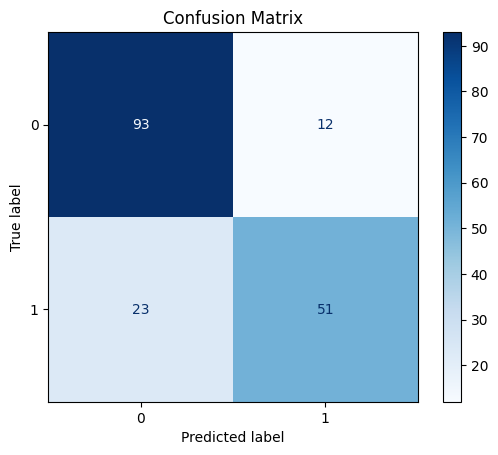

In [40]:
#Confusion matrix
print("Confusion matrix:")
print(confusion_matrix(Y_test, Y_pred_rf))

cm = confusion_matrix(Y_test, Y_pred_rf)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [41]:
#Comparing real values with predictions
Y_pred = model.predict(X_test)
comparison = pd.DataFrame({'Real Values': Y_test, 'Predicted Values': Y_pred})
print(comparison.head(25))

     Real Values  Predicted Values
709            1                 0
439            0                 0
840            0                 0
720            1                 1
39             1                 1
290            1                 1
300            1                 1
333            0                 0
208            1                 1
136            1                 1
137            0                 0
696            0                 0
485            0                 0
244            0                 0
344            0                 0
853            1                 1
621            1                 0
653            1                 1
886            0                 0
110            0                 0
294            0                 0
447            1                 0
192            1                 0
682            0                 0
538            0                 0
